Number of components chosen to explain 90% variance: 13
Logistic Regression Accuracy with original features: 0.7900
Logistic Regression Accuracy with PCA-reduced features: 0.5181


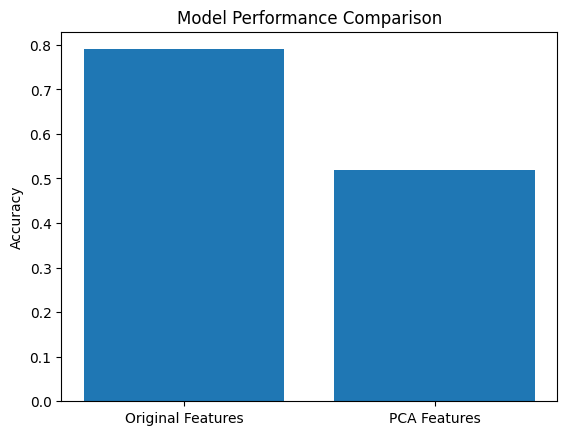

Decision Tree Accuracy with original features: 0.7644
Decision Tree Accuracy with PCA-reduced features: 0.4971


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Loading the dataset
data = pd.read_csv('bank.csv')

# Handling categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Defining target variable and features
X = data.drop('deposit', axis=1)
y = data['deposit']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA & reducing dimensionality to 90% variance
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

# components needed to explain 90% of the variance
print(f"Number of components chosen to explain 90% variance: {X_pca.shape[1]}")

# training and test splits
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Evaluating model performance
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy with original features: {accuracy_logreg:.4f}")

# Training classifier using the PCA-reduced features
X_train_pca, X_test_pca = X_pca[:X_train.shape[0]], X_pca[X_train.shape[0]:]
logreg_pca = LogisticRegression(max_iter=1000, random_state=42)
logreg_pca.fit(X_train_pca, y_train)

# Evaluating model
y_pred_logreg_pca = logreg_pca.predict(X_test_pca)
accuracy_logreg_pca = accuracy_score(y_test, y_pred_logreg_pca)
print(f"Logistic Regression Accuracy with PCA-reduced features: {accuracy_logreg_pca:.4f}")

# Visualization
accuracies = [accuracy_logreg, accuracy_logreg_pca]
labels = ['Original Features', 'PCA Features']

plt.bar(labels, accuracies)
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.show()

# Decision Tree Classifier on original features
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy with original features: {accuracy_dtree:.4f}")

# Train Decision Tree Classifier on PCA-reduced features
dtree_pca = DecisionTreeClassifier(random_state=42)
dtree_pca.fit(X_train_pca, y_train)
y_pred_dtree_pca = dtree_pca.predict(X_test_pca)
accuracy_dtree_pca = accuracy_score(y_test, y_pred_dtree_pca)
print(f"Decision Tree Accuracy with PCA-reduced features: {accuracy_dtree_pca:.4f}")
